<a href="https://colab.research.google.com/github/Robotmcgregor/earth-analytics-python-env/blob/master/Classify_and_Plot_Slope_Raster_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classify and Plot Slope Raster Data in Python

In [ ]:
pip install rasterio

     |████████████████████████████████| 18.2MB 1.6MB/s 


In [ ]:
pip install earthpy

     |████████████████████████████████| 1.4MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 29.8MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 
     |████████████████████████████████| 10.9MB 43.8MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=94c69e8d8f4ddc3c1eab5e82db0dd8d57b16ac34739d305e50345f8aa069ea79
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
slope=("/content/Slope.tif")

In [ ]:
with rio.open(slope) as src:
  slope_im = src.read(1, masked=False)
  spatial_extent_dtm = plotting_extent(src)

#Classify into three classes: short, meduium and tall trees


In [ ]:
print("Min values: ", slope_im.min())
print("Max values: ", slope_im.max())

Min values:  0.012647125
Max values:  16.10761


In [ ]:
slope_im

array([[1.3085033 , 1.440979  , 1.8206338 , ..., 0.82962584, 0.8633837 ,
        1.1165149 ],
       [0.8350273 , 0.8862492 , 1.5300329 , ..., 0.19358617, 0.6945643 ,
        1.2478983 ],
       [0.36222485, 0.6903747 , 1.1481557 , ..., 0.52878886, 1.1308761 ,
        1.4756826 ],
       ...,
       [0.86531013, 1.9132446 , 1.988971  , ..., 1.654165  , 2.4572692 ,
        2.1344123 ],
       [1.1933603 , 1.9519227 , 1.7948577 , ..., 2.4673848 , 2.2208982 ,
        1.6845267 ],
       [1.7147994 , 2.1471791 , 1.7248455 , ..., 2.6075342 , 2.0117035 ,
        1.0408776 ]], dtype=float32)

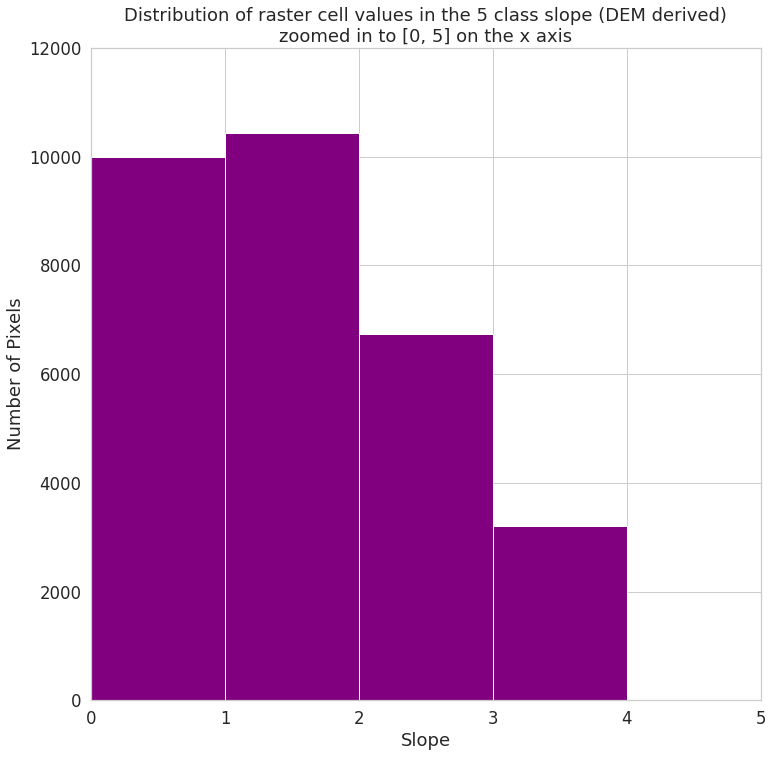

In [ ]:
#constrain the histogram using x and y limits
xlim=[0,5]

fig, ax = ep.hist(slope_im.ravel(),
                  hist_range=xlim,
                  bins=range(*xlim),
                  ylabel="Number of Pixels", xlabel="Slope",
                  title= "Distribution of raster cell values in the 5 class slope (DEM derived)\n" + "zoomed in to {} on the x axis".format(xlim))
ax.set(xlim=xlim, ylim=[0,12000])
plt.show()

In [ ]:
#get values from the histogram
counts, bins = np.histogram(slope_im,
                            bins=[0, 1, 2, 3, 4, 5])
print("Counts: ", counts)
print("Bins: ", bins)

Counts:  [ 9993 10434  6731  3205  1036]
Bins:  [0 1 2 3 4 5]


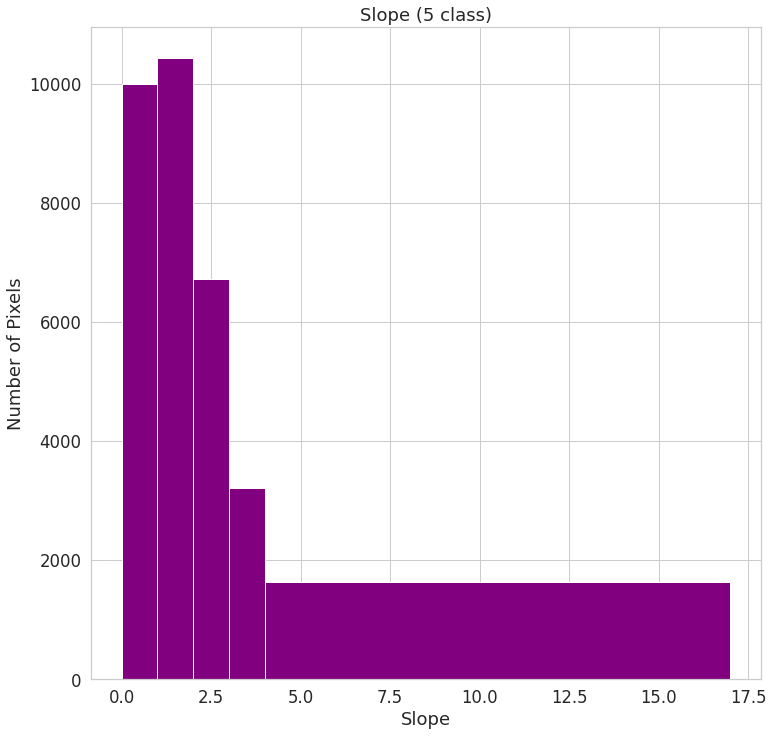

In [ ]:
#Create breaks (bins)
bins=[0, 1, 2, 3, 4, 17] 
slope_classes = ("0-1", "1-2", "2-3", "3-4", ">5")
 
# Histogram with custom breaks
ep.hist(slope_im.ravel(),
        bins= bins,
        title="Slope (5 class)",
        xlabel="Slope", 
        ylabel="Number of Pixels")


plt.show()

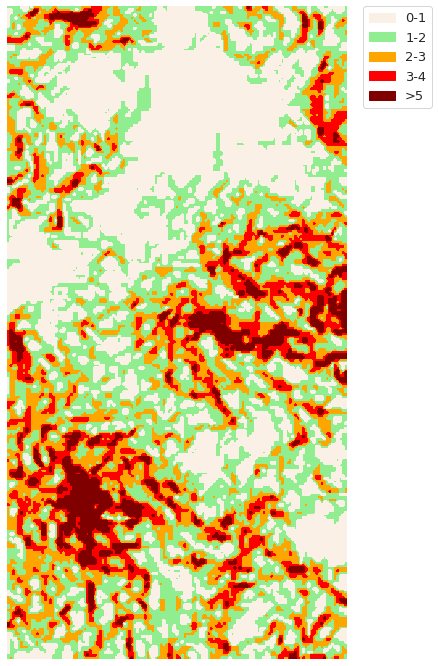

In [ ]:
# Create a list of labels to use for your legend
height_class_labels = ["0-1", "1-2", "2-3", "3-4", ">5"]

# Create a colormap from a list of colors
colors = ['linen', 'lightgreen', 'orange', 'red', 'maroon']
cmap = ListedColormap(colors)

f, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(slope_im_class,
               cmap=cmap)

ep.draw_legend(im, titles=height_class_labels)
ax.set_axis_off()

plt.show()